In [1]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [3]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [8]:
content_path = "/content/dragon.jpg"
style_path = "/content/pixel_art.jpg"


def load_img(path_to_img):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  return img

target_size = (512, 512)  # Choisir une taille compatible avec le modèle
content_image = load_img(content_path)
style_image = load_img(style_path)
content_image_resized = tf.image.resize(content_image, target_size)
style_image_resized = tf.image.resize(style_image, target_size)

# Afficher les dimensions des images
print("Content image shape:", content_image_resized.shape)
print("Style image shape:", style_image_resized.shape)

Content image shape: (512, 512, 3)
Style image shape: (512, 512, 3)


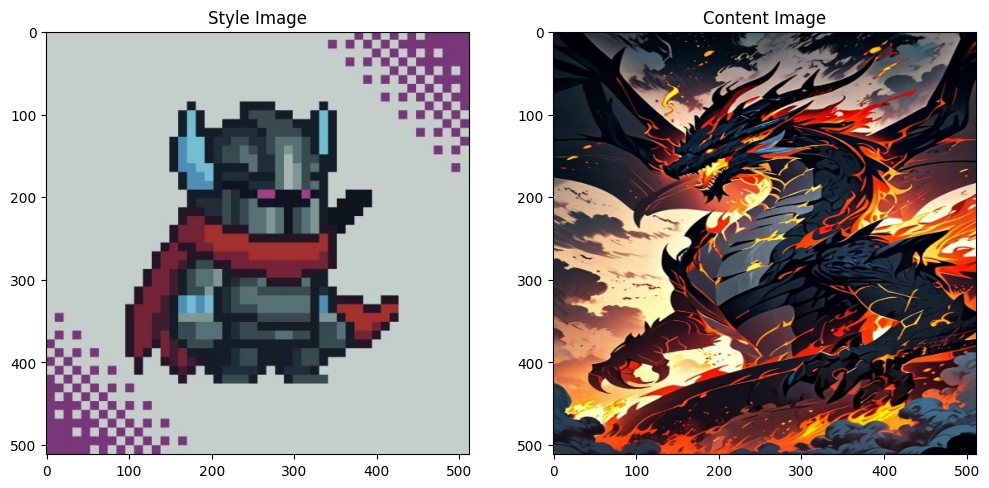

In [13]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

plt.subplot(1, 2, 1)
imshow(style_image_resized, 'Style Image')
plt.subplot(1, 2, 2)
imshow(content_image_resized, 'Content Image')

In [16]:
content_image_resized.shape

TensorShape([512, 512, 3])

In [17]:
content_image_resized = tf.expand_dims(content_image_resized, axis=0) # Add batch dimension
style_image_resized = tf.expand_dims(style_image_resized, axis=0) # Add batch dimension

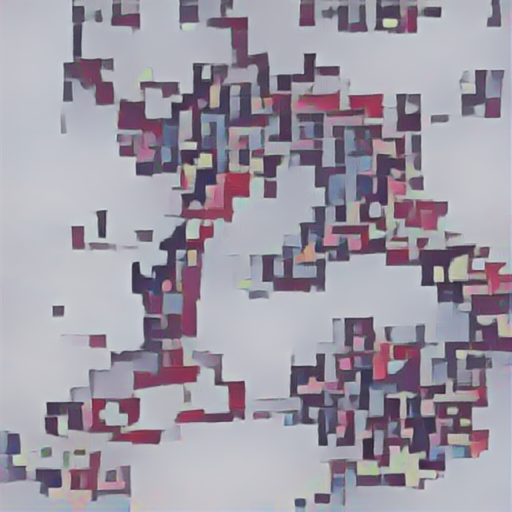

In [18]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image_resized), tf.constant(style_image_resized))[0]
tensor_to_image(stylized_image)